<a href="https://colab.research.google.com/github/lblabucsd/Zada_Schulze_24/blob/main/plotting_and_stats_pipeline_light_dark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

latest update: MLB. JuL26, 2023

# Prep

In [ ]:
# Mount the Google Drive to the Google Colab notebook
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from google.colab import auth
auth.authenticate_user()

!pip install scikit-posthocs
import math
import time
import os
import sys
import glob
import seaborn as sns
import numpy as np
import scikit_posthocs as sp
import pandas as pd
import scipy
import scipy.stats as stats
from scipy.stats import circmean, circvar, circstd
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sns.set(font_scale=3)
sns.set_style("white")


In [ ]:
# run this to import & update modules when you make changes in the utils.ipynb
%cd '/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper'
%run data_processing_utils.ipynb

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-feb60b728b94>", line 2, in <cell line: 2>
    get_ipython().run_line_magic('cd', "'/content/drive/MyDrive/Zada_Schulze_paper/Colab_notebooks_paper'")
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/pyth

In [ ]:
# directories for the data and analysis

experiment_class = 'Light-Dark_Exp'
tab_name = 'old_LD_test'

path = '/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/'+experiment_class+'/'
gsheet = 'https://docs.google.com/spreadsheets/d/1ud4Ifs4Sw3Kth9x_74JBBqgY0MvTXCbLroHDKO8mvQI/edit?usp=sharing'

metadata = read_metadata(gsheet,tab_name)
experiments = metadata.index

figure_savepath = '/content/drive/MyDrive/Zada_Schulze_paper/Figures_output/Light-Dark/'

,experiment,exp_type,fish_num,fps_Hz,rig_mm,vid_px,trim,wall_pos_px,notes,tracking,habx,video,raw_vid_name
0,labels.vDavid_8wpf_070122_L1.analysis,light,4,120,300,1000,,,,,,,
1,labels.vDavid_8wpf_070122_D1.analysis,dark,4,120,300,1000,,,,,,15,
2,labels.vDavid_8wpf_070122_L2.analysis,light,4,120,300,1000,,,,,,15,
3,labels.vDavid_8wpf_070122_D2.analysis,dark,4,120,300,1000,,,,,,15,
4,labels.vDavid_8wpf_070122_L3.analysis,light,4,120,300,1000,,,,,,15,
5,labels.vDavid_8wpf_070122_D3.analysis,dark,4,120,300,1000,,,,,,15,
6,labels.vDavid_8wpf_091622_L1.analysis,light,4,120,300,1000,,,,,,15,
7,labels.vDavid_8wpf_091622_L2.analysis,light,4,120,300,1000,,,,,,15,
8,labels.vDavid_8wpf_091622_D1.analysis,dark,4,120,300,1000,,,,,,15,
9,labels.vDavid_8wpf_091622_D2.analysis,dark,4,120,300,1000,,,,,,15,


# Main workflow

## Level 0

In [ ]:
# info stored in npz

# lev0_basics.npz: 'exp_type', 'fish_num', int, 'scale' (mm/px)
# 'fps' (Hz), 'f_bodylength_mm','f_bodylength_px'
# 'f_nosex','f_nosey','f_x','f_y','f_tailx','f_taily'
# 'f_heading','f_tail_angle','f_speed','f_ang_speed'

# lev0_neighbor_stats.npz
# 'ff_dist','ff_align':,'f_IID','f_IIA'
# 'f_closest','f_closest_dist','f_closest_align'

# lev1_egomaps_full_experiment.npz
#'occupancy_maps','f_alignment_maps'
#'f_speed_maps', 'f_ang_speed_maps'

Exception ignored in: <function NpzFile.__del__ at 0x7b3445f27910>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 213, in __del__
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 208, in close
OSError: [Errno 107] Transport endpoint is not connected


labels.vDavid_8wpf_070122_L1.analysis
light 4 0.3 [5.77012138 5.45618596 5.73260804 5.57900395]


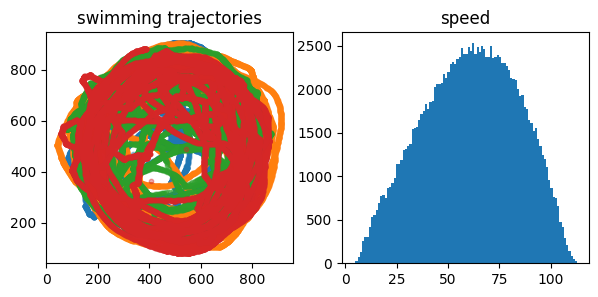

labels.vDavid_8wpf_070122_D1.analysis
dark 4 0.3 [5.77802219 5.41342794 5.42528531 5.43363919]


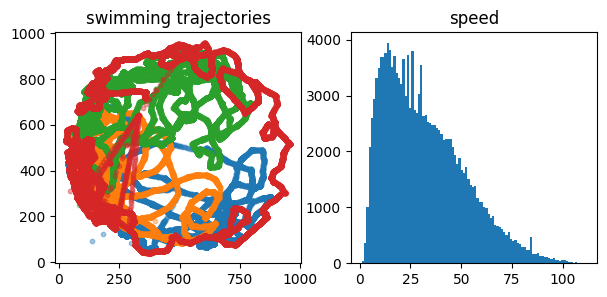

labels.vDavid_8wpf_070122_L2.analysis
light 4 0.3 [5.73039419 5.91667267 5.81614972 5.89759776]


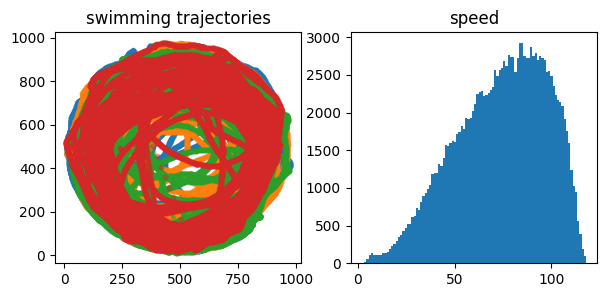

labels.vDavid_8wpf_070122_D2.analysis
dark 4 0.3 [5.58577726 5.75621367 5.58087504 5.78377783]


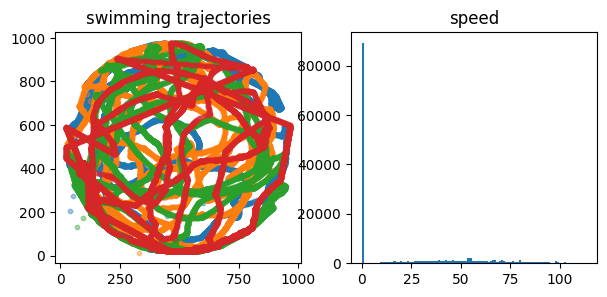

labels.vDavid_8wpf_070122_L3.analysis
light 4 0.3 [5.81023454 5.65771908 5.826177   5.66423385]


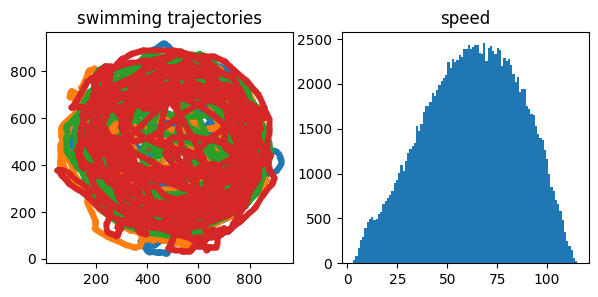

labels.vDavid_8wpf_070122_D3.analysis
dark 4 0.3 [5.70107943 5.49377479 5.56914817 5.42906953]


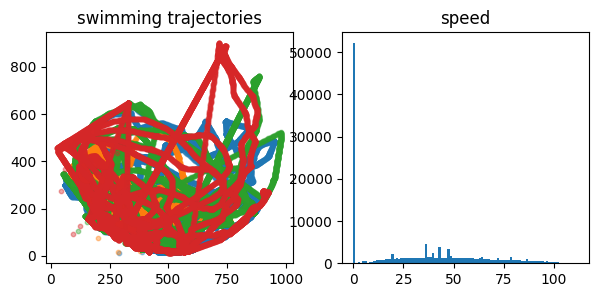

labels.vDavid_8wpf_091622_L1.analysis
light 4 0.3 [5.668947   5.76568578 5.6357809  5.79814247]


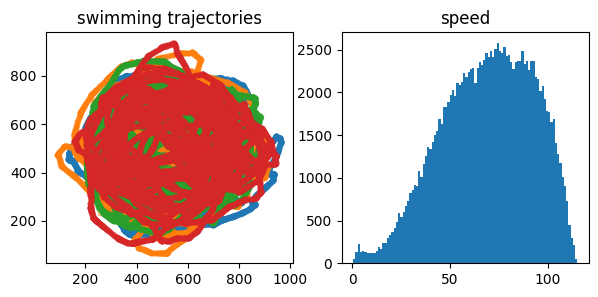

labels.vDavid_8wpf_091622_L2.analysis
light 4 0.3 [5.63906861 5.64763281 5.7980314  5.65011271]


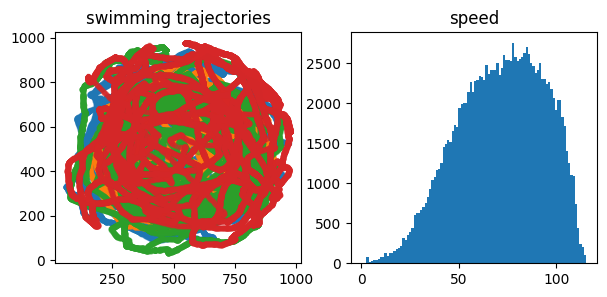

labels.vDavid_8wpf_091622_D1.analysis
dark 4 0.3 [5.19358519 5.22034381 5.02501775 5.36865593]


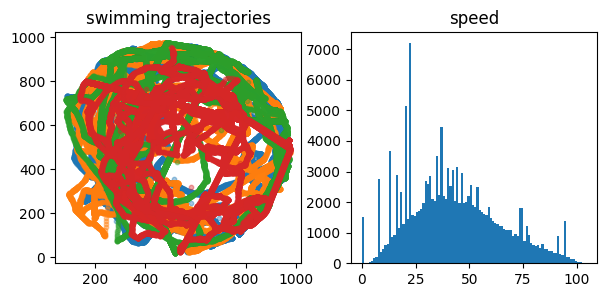

labels.vDavid_8wpf_091622_D2.analysis
dark 4 0.3 [6.12691562 5.97368672 5.50839775 5.41443876]


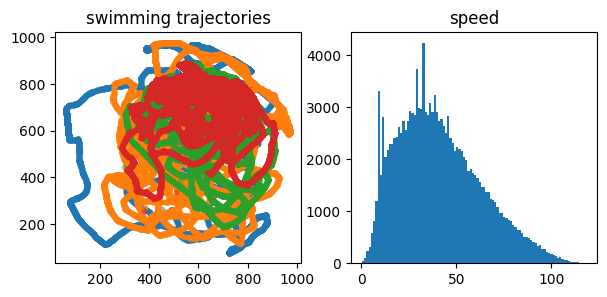

In [ ]:
# from traitlets.config.configurable import SingletonConfigurable
# loop through all experiment in the log

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    print(str(exp))

    # access analysis folder with npz and get the info
    folder = path + exp + '/'

    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    print(exp_type, fish_num, scale, bodylength)

    plt.figure(figsize=[7,3])
    plt.subplot(121)
    for f in range(fish_num):
      plt.scatter(f_x[f],f_y[f],alpha=0.4, s=10)
    plt.title('swimming trajectories')

    plt.subplot(122)
    tmp=[]
    for f in range(fish_num):
      [tmp.append(x) for x in f_speed[f]]
    plt.hist(tmp, bins=100)
    plt.title('speed')

    plt.show()



EXAMPLE VISUALIZATION FOR FIGURE 1


36459


<Figure size 300x300 with 0 Axes>

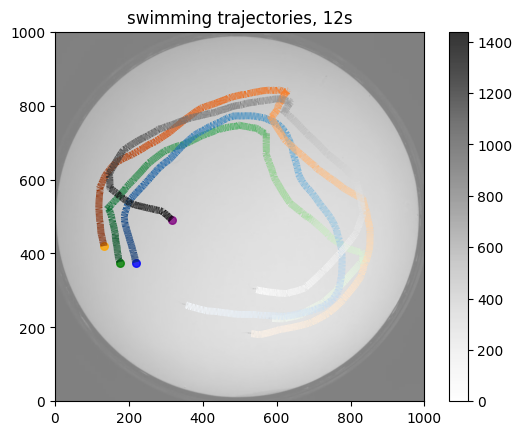

In [ ]:
#show example data
import cv2
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors

# Open the video file
video = cv2.VideoCapture('/content/drive/MyDrive/Zada_Schulze_paper/Behavior_data/070122_8wpf_20minL20minD_ctrl3_10minLTrim.mp4')

num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

arena=300.0 #mm
frame_starts=[4000]
colorz=['Greens','Blues','Oranges','Purples', 'Greys', 'Reds' ]
colorz2=['green','blue','orange','purple', 'green', 'red']

for exp in ['labels.vDavid_8wpf_070122_3.analysis']:

    # access analysis folder with npz and get the info
    folder = path + exp + '/'

    data = np.load('/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/Development_Exp/labels.vDavid_8wpf_070122_3.analysis/labels.vDavid_8wpf_070122_3.analysis_lev0_basics.npz')
    fish_num, scale, bodylength, fps = data['fish_num'], data['scale'], data['f_bodylength_mm'], data['fps']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load('/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/Development_Exp/labels.vDavid_8wpf_070122_3.analysis/labels.vDavid_8wpf_070122_3.analysis_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    print(len(f_heading[0]))

    plot_length = 12*fps

    for frame_start in frame_starts:

      plt.figure(figsize=[3,3])
      fig, ax = plt.subplots()

      video.set(cv2.CAP_PROP_POS_FRAMES, frame_start)
      ret, frame = video.read()
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      plt.imshow(frame, alpha=0.5)
      plt.gca().invert_yaxis()

      for f in range(fish_num):

        x = f_x[f][frame_start:frame_start+plot_length]
        y = f_y[f][frame_start:frame_start+plot_length]
        time = np.array(range(plot_length))

        norm = mcolors.Normalize(time.min(), time.max())
        cmap = plt.get_cmap(colorz[f])

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = mcoll.LineCollection(segments, array=time, cmap=cmap, norm=norm, linewidth=5, alpha=0.8)

        line = ax.add_collection(lc)

        plt.scatter(f_x[f][frame_start+plot_length],f_y[f][frame_start+plot_length],color=colorz2[f], alpha=0.8, s=30)

      fig.colorbar(line, ax=ax)
      ax.set_xlim(0,1000)
      ax.set_ylim(0,1000)

      plt.title('swimming trajectories, 12s')
      plt.savefig(figure_savepath +"_EXAMPLE_schooling_fullarena.pdf", transparent=True)
      plt.show()

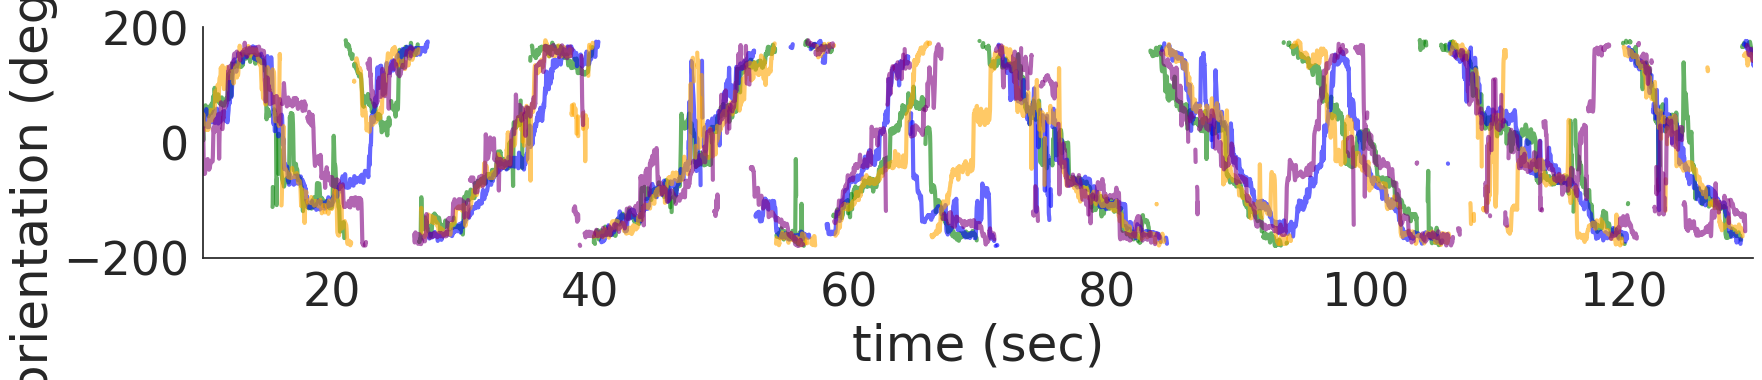

In [ ]:
#show timeseries of heading directions
def running_mean(x, N):
    return np.convolve(x, np.ones(N)/N, mode='same')


colorz=['Greens','Blues','Oranges','Purples', 'Greys', 'Reds' ]
colorz2=['green','blue','orange','purple', 'green', 'red']

for exp in ['labels.vDavid_8wpf_070122_3.analysis']:

    # access analysis folder with npz and get the info
    folder = path + exp + '/'

    data = np.load('/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/Development_Exp/labels.vDavid_8wpf_070122_3.analysis/labels.vDavid_8wpf_070122_3.analysis_lev0_basics.npz')
    fish_num, scale, bodylength, fps = data['fish_num'], data['scale'], data['f_bodylength_mm'], data['fps']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load('/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/Development_Exp/labels.vDavid_8wpf_070122_3.analysis/labels.vDavid_8wpf_070122_3.analysis_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    plt.figure(figsize=[20,3])
    plot_length = 25*fps
    for f in range(fish_num):
      time = np.arange(f_heading.shape[-1])/120
      angles = f_heading[f]
      last_i = 0

      for i in range(1, len(time)):
        # Check for a discontinuity (remove jumps from -180 to 180, for example)
        if i>last_i:
          if np.abs(angles[i] - angles[i-1]) > 30:
              plt.plot(time[last_i:i], angles[last_i:i], color=colorz2[f], alpha=0.6, linewidth=3)
              last_i = i + 12
    plt.xlim(10,130)
    #plt.xlim(10,50)
    plt.ylim(-200,200)
    plt.xlabel('time (sec)')
    plt.ylabel('orientation (degree)')
    sns.despine()
    plt.savefig(figure_savepath +"_EXAMPLE_heading_directions.pdf", transparent=True)
    plt.show()


Total number of frames: 36459


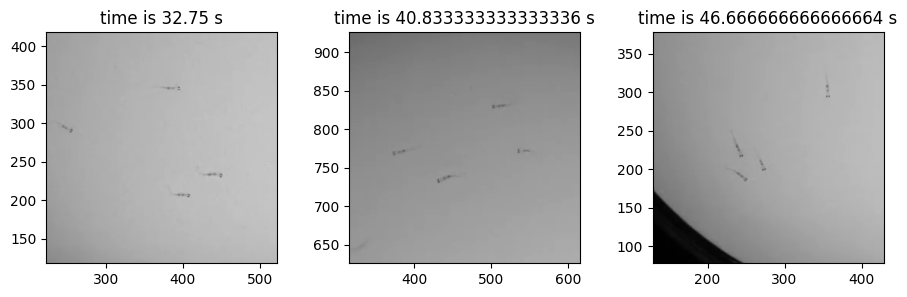

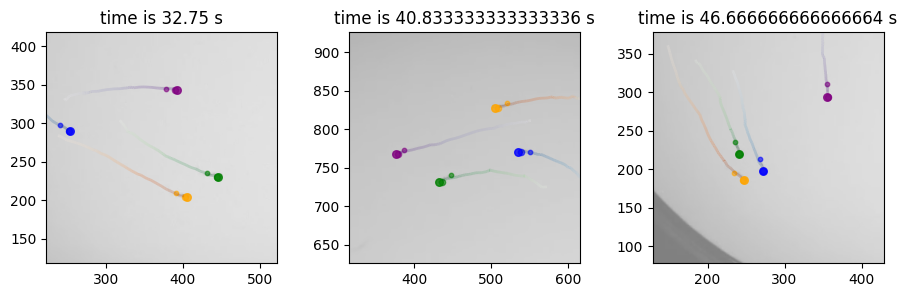

In [ ]:
#show zoom-ins of individual frames

# Open the video file
video = cv2.VideoCapture('/content/drive/MyDrive/Zada_Schulze_paper/Behavior_data/070122_8wpf_20minL20minD_ctrl3_10minLTrim.mp4')

num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total number of frames: {num_frames}")

single_frames= [3930,4900,5600]

colorz=['Greens','Blues','Oranges','Purples', 'Greys', 'Reds' ]
colorz2=['green','blue','orange','purple', 'green', 'red']


for exp in ['labels.vDavid_8wpf_070122_3.analysis']:

    # access analysis folder with npz and get the info
    folder = path + exp + '/'

    data = np.load('/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/Development_Exp/labels.vDavid_8wpf_070122_3.analysis/labels.vDavid_8wpf_070122_3.analysis_lev0_basics.npz')
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']

    plt.figure(figsize=[15,3])
    for ndx,framenum in enumerate(single_frames):

      plt.subplot(1,4,ndx+1)
      video.set(cv2.CAP_PROP_POS_FRAMES, framenum)
      ret, frame = video.read()
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      xss=[];yss=[]
      ax = plt.subplot(1,4,ndx+1)

      for f in range(fish_num):
        xss.append(f_x[f][framenum]); yss.append(f_y[f][framenum])
      plt.imshow(frame)
      plt.gca().invert_yaxis()

      plt.xlim(np.mean(xss)-150, np.mean(xss)+150)
      plt.ylim(np.mean(yss)-150, np.mean(yss)+150)

      plt.title("time is "+str(framenum/120)+" s")
    plt.savefig(figure_savepath +"_EXAMPLE_schooling_closeup-raw.pdf", transparent=True)
    plt.show()


for exp in ['labels.vDavid_8wpf_070122_3.analysis']:

    # access analysis folder with npz and get the info
    folder = path + exp + '/'

    data = np.load('/content/drive/MyDrive/Zada_Schulze_paper/Analysis_output/Development_Exp/labels.vDavid_8wpf_070122_3.analysis/labels.vDavid_8wpf_070122_3.analysis_lev0_basics.npz')
    fish_num, scale, bodylength, fps = data['fish_num'], data['scale'], data['f_bodylength_mm'], data['fps']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    f_tailx,f_taily = data['f_tailx'],data['f_taily']
    f_nosex,f_nosey,f_bodylength_px = data['f_nosex'],data['f_nosey'],data['f_bodylength_px']

    plt.figure(figsize=[15,3])
    for ndx,framenum in enumerate(single_frames):

      plt.subplot(1,4,ndx+1)
      video.set(cv2.CAP_PROP_POS_FRAMES, framenum)
      ret, frame = video.read()
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

      xss=[];yss=[]
      ax = plt.subplot(1,4,ndx+1)

      for f in range(fish_num):
        plt.scatter(f_nosex[f][framenum],f_nosey[f][framenum],color=colorz2[f], alpha=0.8,s=30)
        plt.scatter(f_x[f][framenum],f_nosey[f][framenum],color=colorz2[f], alpha=0.6,s=20)
        plt.scatter(f_tailx[f][framenum],f_taily[f][framenum],color=colorz2[f], alpha=0.6,s=10)
        xss.append(f_x[f][framenum]); yss.append(f_y[f][framenum])

        x = f_x[f][framenum-120:framenum]
        y = f_y[f][framenum-120:framenum]
        time = np.array(range(120))

        norm = mcolors.Normalize(time.min(), time.max())
        cmap = plt.get_cmap(colorz[f])

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = mcoll.LineCollection(segments, array=time, cmap=cmap, norm=norm, linewidth=2, alpha=0.2)

        line = ax.add_collection(lc)


      plt.imshow(frame, alpha=0.5)
      plt.gca().invert_yaxis()

      plt.xlim(np.mean(xss)-150, np.mean(xss)+150)
      plt.ylim(np.mean(yss)-150, np.mean(yss)+150)

      plt.title("time is "+str(framenum/120)+" s")
    plt.savefig(figure_savepath +"_EXAMPLE_schooling_closeup-tracks.pdf", transparent=True)
    plt.show()

#Release the video file
video.release()


#descriptive stats to compare across ages (1-way ANOVAs w/ pairwise posthoc comparison). (on a per-fish or group basis)

bodylength (mm)


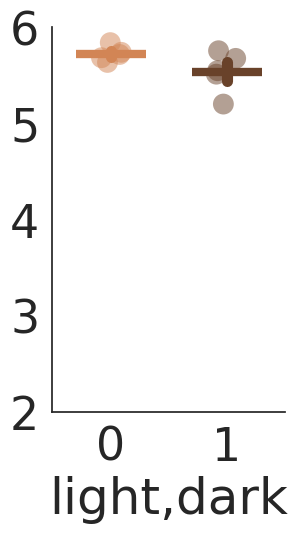

statistics for comparison: Mann-Whitney U test
U-statistic:  20.0 P-value:  0.15079365079365079


In [ ]:
#PLOT BODYLENGTH
plt.figure(figsize=[3,5])

light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean(bodylength))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)

plt.xlabel('light,dark')
print('bodylength (mm)')
sns.despine()
plt.ylim(2,6)
plt.savefig(figure_savepath +"_bodylength.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


fraction time moving


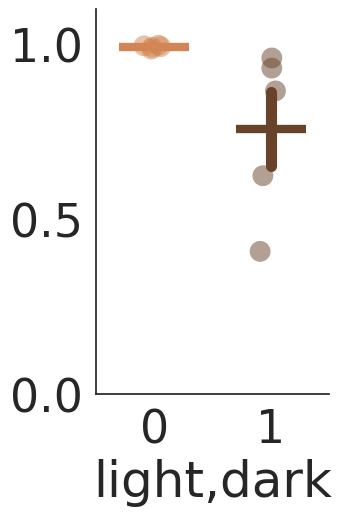

statistics for comparison: Mann-Whitney U test
U-statistic:  25.0 P-value:  0.007936507936507936
group #, N, MEANS, and SEM
0 5 0.9926821257474439 0.001918057069981826
1 5 0.7583788784474118 0.10567631693756442
length of recording (s)


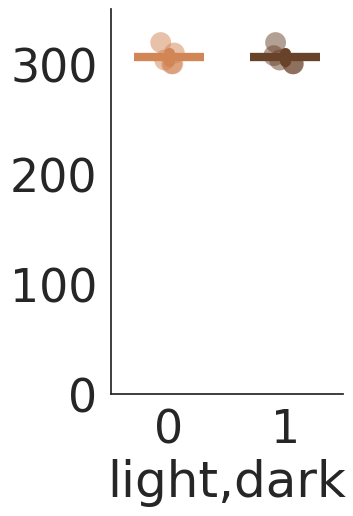

statistics for comparison: Mann-Whitney U test
U-statistic:  13.0 P-value:  1.0


In [ ]:
#PLOT fraction time moving (more than 2.0 body lengths/s), and video recording time
thresh=2.0

#PLOT fraction time moving
plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean([sum([1 for d in i if d/j > thresh])/len(i) for i,j in zip(f_speed,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light,dark')
plt.ylim(0,1.1)
print('fraction time moving')
sns.despine()
plt.savefig(figure_savepath +"_fraction_time_moving.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)

print("group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))



plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    exp_type, f_x, fps = data['exp_type'], data['f_x'], data['fps']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(len(f_x[0])/fps)

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light,dark')
plt.ylim(0,350)
print('length of recording (s)')
sns.despine()
plt.savefig(figure_savepath +"_recording_length.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)

group area (mm2) 


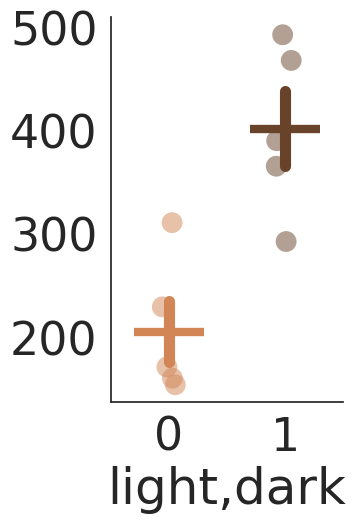

statistics for comparison: Mann-Whitney U test
U-statistic:  1.0 P-value:  0.015873015873015872
group #, N, MEANS, and SEM
0 5 205.013329546973 29.606513164222765
1 5 401.5989417318042 36.05877466462626


In [ ]:
#PLOT Group area
plt.figure(figsize=[3,5])

light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    group_area = data['group_area']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean(group_area)/np.mean(bodylength))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light,dark')
print('group area (mm2/bodylength) ')
sns.despine()
plt.savefig(figure_savepath +"_group_area.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)

print("group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))


speed


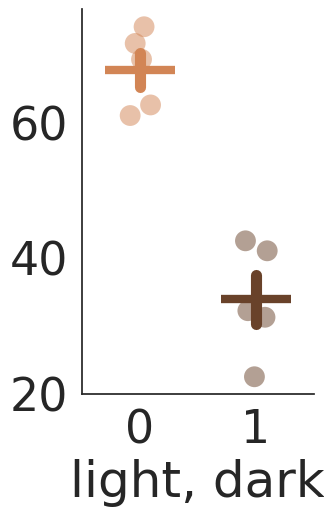

statistics for comparison: Mann-Whitney U test
U-statistic:  25.0 P-value:  0.007936507936507936
speed/bodylength


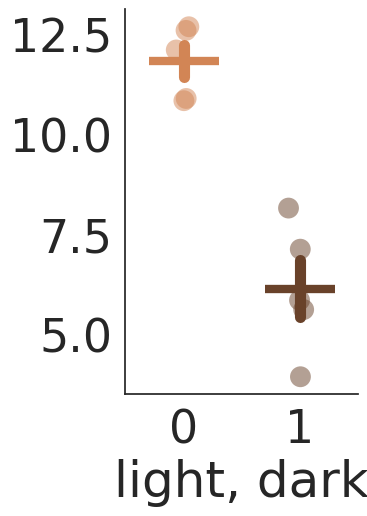

statistics for comparison: Mann-Whitney U test
U-statistic:  25.0 P-value:  0.007936507936507936
group #, N, MEANS, and SEM
0 5 11.829595836488929 0.4035580470237231
1 5 6.142379979185587 0.7154591030549987


In [ ]:
#PLOT SPEED (raw and by bodylength)
plt.figure(figsize=[3,5])

light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean([np.mean(i) for i in f_speed]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('speed')
sns.despine()
plt.savefig(figure_savepath +"_speed.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean([np.mean(i)/j for i,j in zip(f_speed,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('speed/bodylength')
sns.despine()
plt.savefig(figure_savepath +"_speed_bodylength-norm.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)

print("group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))




speed correlations


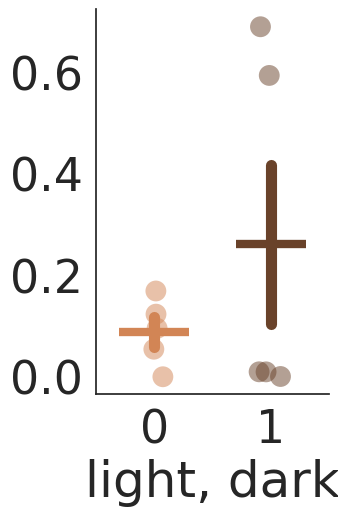

statistics for comparison: Mann-Whitney U test
U-statistic:  12.0 P-value:  1.0


In [ ]:
#PLOT speed correlations (one average value across the group)
plt.figure(figsize=[3,5])

light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        data = np.vstack(f_speed)
        corr_matrix = np.corrcoef(data)
        off_diagonal_elements = corr_matrix[np.triu_indices_from(corr_matrix, k=1)]
        s.append(np.mean(off_diagonal_elements))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('speed correlations')
sns.despine()
plt.savefig(figure_savepath +"_speed_correlations.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


angular speed correlations


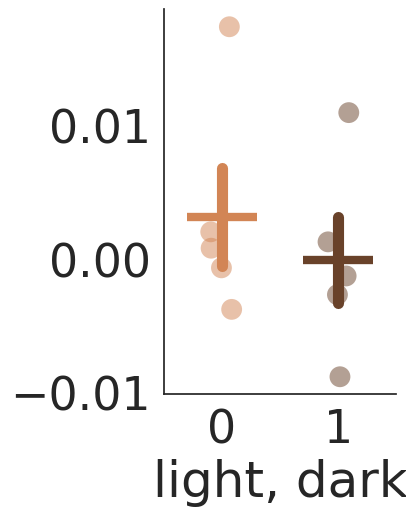

statistics for comparison: Mann-Whitney U test
U-statistic:  16.0 P-value:  0.5476190476190477


In [ ]:
#PLOT angular speed correlations (one average value across the group)
plt.figure(figsize=[3,5])

light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_ang_speed = data['f_heading'], data['f_ang_speed']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        data = np.vstack(f_ang_speed)
        corr_matrix = np.corrcoef(data)
        off_diagonal_elements = corr_matrix[np.triu_indices_from(corr_matrix, k=1)]
        s.append(np.mean(off_diagonal_elements))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('angular speed correlations')
sns.despine()
plt.savefig(figure_savepath +"_angular_speed_correlations.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


heading correlations


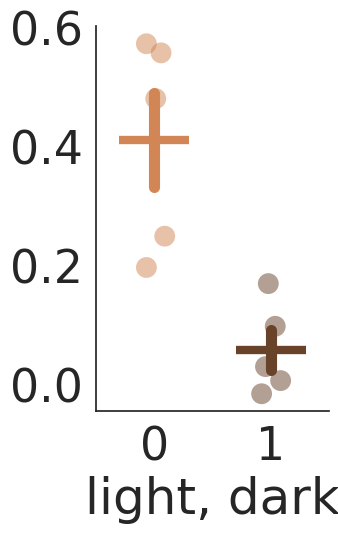

statistics for comparison: Mann-Whitney U test
U-statistic:  25.0 P-value:  0.007936507936507936
group #, N, MEANS, and SEM
0 5 0.4102652966434679 0.07880944486539496
1 5 0.057032061468596684 0.03377957459418827


In [ ]:
#PLOT angle correlations (one average value across the group)

plt.figure(figsize=[3,5])

light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        data = np.vstack(f_heading)
        corr_matrix = np.corrcoef(data)
        off_diagonal_elements = corr_matrix[np.triu_indices_from(corr_matrix, k=1)]
        s.append(np.mean(off_diagonal_elements))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('heading correlations')
sns.despine()
plt.savefig(figure_savepath +"_heading_direction_correlations.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)

print("group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))


circular STD of IIA


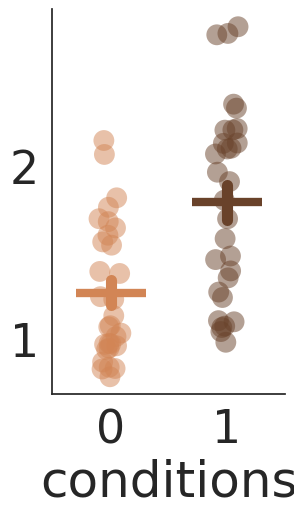

statistics for comparison: Mann-Whitney U test
U-statistic:  191.0 P-value:  0.0001324951052218608
group #, N, MEANS, and SEM
0 30 1.2660218640906367 0.07203428000390358
1 30 1.7908643777664819 0.10182861525804522
circular std of nearest fish angle


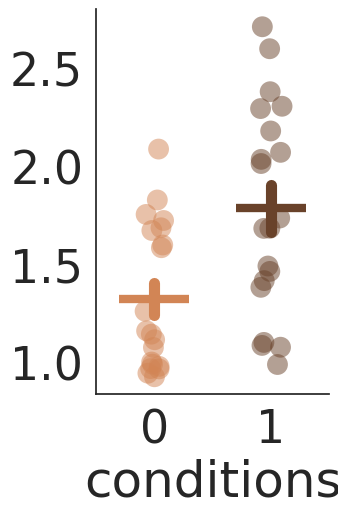

statistics for comparison: Mann-Whitney U test
U-statistic:  99.0 P-value:  0.006557192645280169


In [ ]:
#PLOT Inter-animal distance IIA (circular STD)
plt.figure(figsize=[3,5])

light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        for i in f_IIA:
          angle_diffs_rad = np.deg2rad(i)
          s.append(circstd(angle_diffs_rad))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('conditions')
print('circular STD of IIA')
sns.despine()
plt.savefig(figure_savepath +"_heading_angle_STD.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()


print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)

print("group #, N, MEANS, and SEM")
for ndx,i in enumerate(summary_data):
  print(ndx, len(i), np.mean(i), scipy.stats.sem(i))



plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        for i in f_closest_align:
          angle_diffs_rad = np.deg2rad(i)
          s.append(circstd(angle_diffs_rad))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
sns.despine()
plt.xlabel('conditions')
print('circular std of nearest fish angle')
plt.savefig(figure_savepath +"_heading_angle_STD_closestfish.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)

nearest fish distance


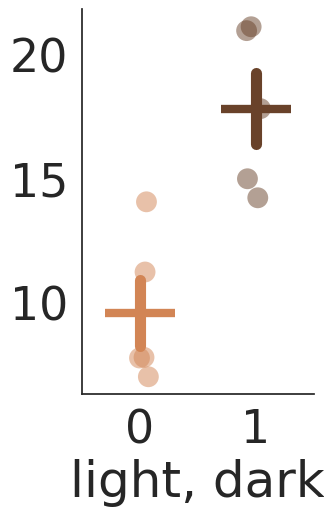

statistics for comparison: Mann-Whitney U test
U-statistic:  0.0 P-value:  0.007936507936507936
nearest fish distance/bodylength


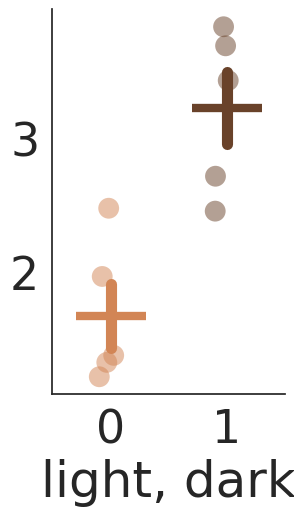

statistics for comparison: Mann-Whitney U test
U-statistic:  1.0 P-value:  0.015873015873015872
nearest fish distance/arena diameter


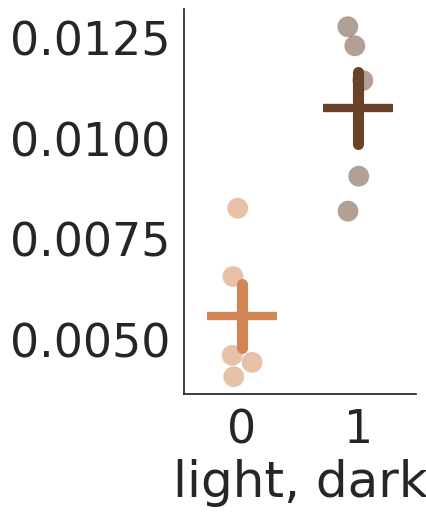

statistics for comparison: Mann-Whitney U test
U-statistic:  1.0 P-value:  0.015873015873015872


In [ ]:
#PLOT Inter-animal distance  - nearest fish (raw and by bodylength)
plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean([np.mean(i) for i in f_closest_dist]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('nearest fish distance')
sns.despine()
plt.savefig(figure_savepath +"_closest_fish_distance.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean([(np.mean(i)/j) for i,j in zip(f_closest_dist,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('nearest fish distance/bodylength')
sns.despine()
plt.savefig(figure_savepath +"_closest_fish_distance_bodylength-norm.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        arena=300.0
        s.append(np.mean([(np.mean(i)/j)/arena for i,j in zip(f_closest_dist,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('nearest fish distance/arena diameter')
sns.despine()
plt.savefig(figure_savepath +"_closest_fish_distance_arena-fraction.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


IID


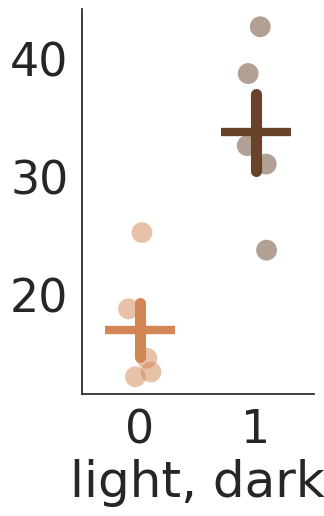

statistics for comparison: Mann-Whitney U test
U-statistic:  1.0 P-value:  0.015873015873015872
f_IID/bodylength


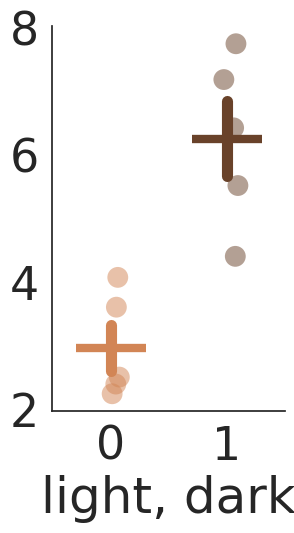

statistics for comparison: Mann-Whitney U test
U-statistic:  0.0 P-value:  0.007936507936507936
f_IID/arena diameter


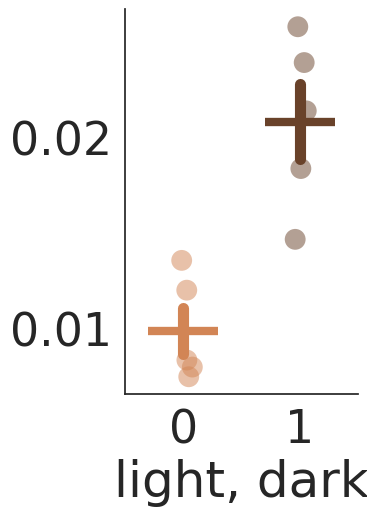

statistics for comparison: Mann-Whitney U test
U-statistic:  0.0 P-value:  0.007936507936507936


In [ ]:
#PLOT Inter-animal distance IID (raw and by bodylength)
plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean([np.mean(i) for i in f_IID]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('IID')
sns.despine()
plt.savefig(figure_savepath +"_mean_inter-animal_distance.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()


print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean([np.mean(i)/j for i,j in zip(f_IID,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('f_IID/bodylength')
sns.despine()
plt.savefig(figure_savepath +"_mean_inter-animal_distance_bodylength-norm.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()


print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


plt.figure(figsize=[3,5])
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IID, f_IIA = data['f_IID']*scale,data['f_IIA']
    f_closest_dist,f_closest_align = data['f_closest_dist']*scale,data['f_closest_align']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        arena=300.0
        s.append(np.mean([(np.mean(i)/j)/arena for i,j in zip(f_IID,bodylength)]))

sns.pointplot(data=summary_data, estimator='mean', errorbar='se', markers='_', markersize=50, linewidth=8, palette='copper_r', linestyle='none')
sns.stripplot(data=summary_data, s=15, palette='copper_r', jitter=True, alpha=0.5)
plt.xlabel('light, dark')
print('f_IID/arena diameter')
sns.despine()
plt.savefig(figure_savepath +"_mean_inter-animal_distance_arena-fraction.pdf", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

print('statistics for comparison: Mann-Whitney U test')
data = pd.DataFrame({
    'value': np.concatenate(summary_data),
    'group': np.repeat(conditions,
                       repeats=[len(summary_data[0]), len(summary_data[1])])
})

# Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(light, dark)
print("U-statistic: ", u_statistic, "P-value: ", p_value)


OCCUPANCY MAPS
(5, 50, 50)
egocentric occupancy - 6 body lengths ()
(5, 50, 50)
egocentric occupancy - 6 body lengths ()


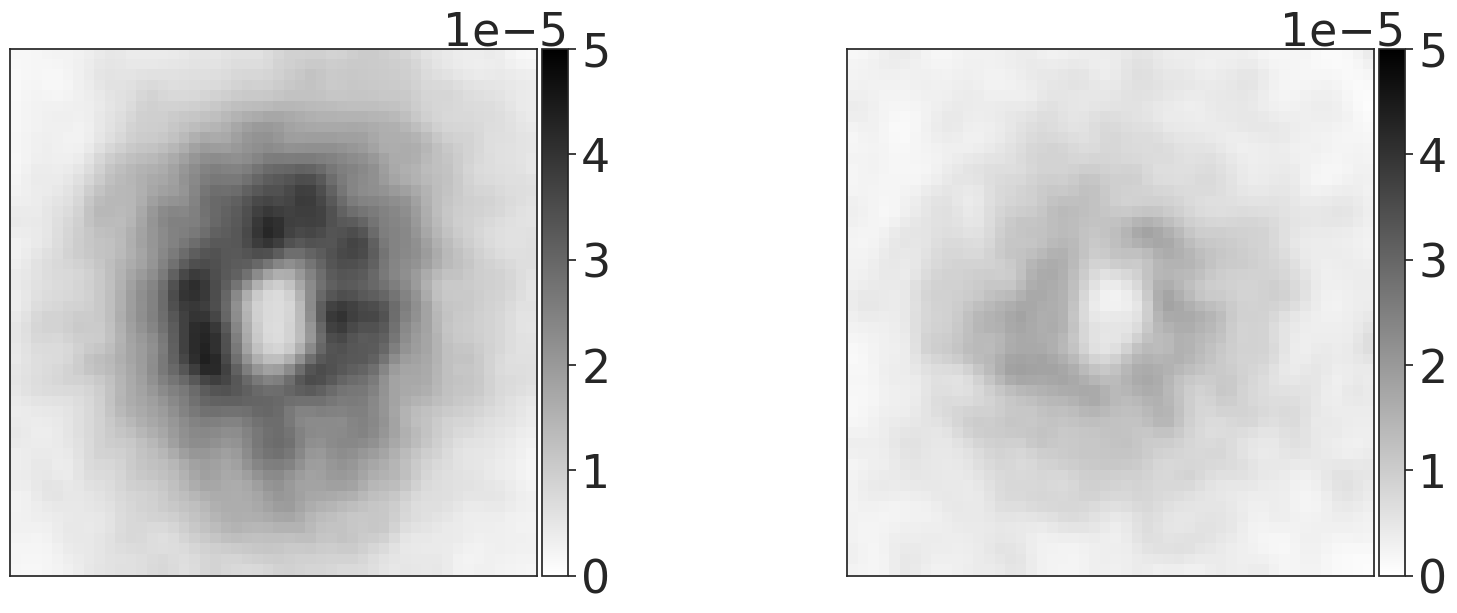

<ipython-input-106-6c92a10daf7a>:50: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1,2,ndx+1)
<ipython-input-106-6c92a10daf7a>:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('copper_r')(0.3*(ndx+1)), linewidth=6)


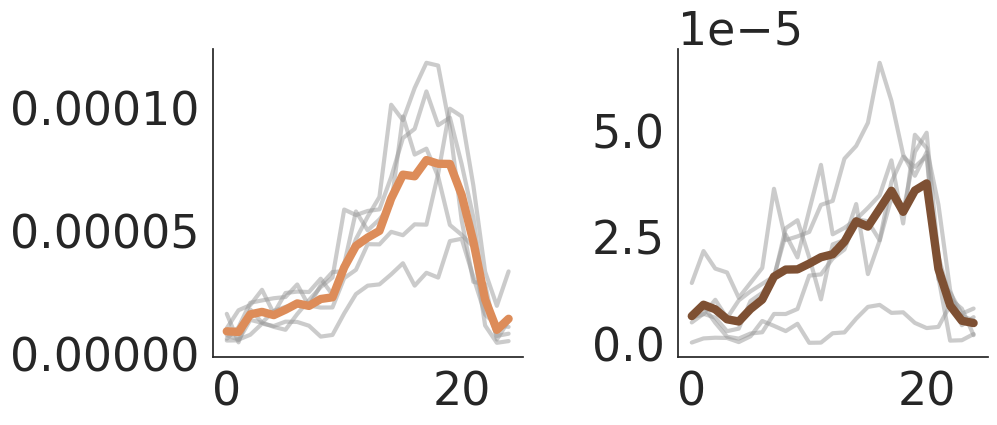

<ipython-input-106-6c92a10daf7a>:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('copper_r')(0.3*(ndx+1)), linewidth=6, alpha=0.7)


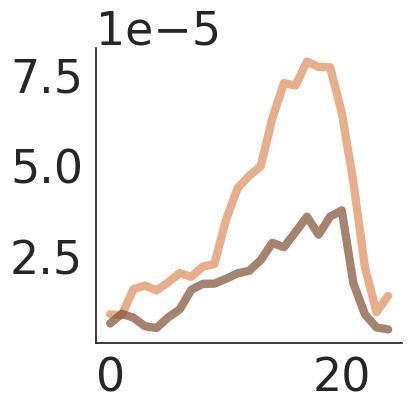

'\n#in mm\nlight=[]; dark=[];\nsummary_data = [light,dark]\nconditions = [\'light\',\'dark\']\n\nfor exp in experiments:\n  if os.path.isfile(path + exp + \'/\' + exp + \'_lev0_basics.npz\') == True:\n    folder = path + exp + \'/\'\n    data = np.load(folder + exp + \'_lev0_basics.npz\')\n    fish_num, scale, bodylength = data[\'fish_num\'], data[\'scale\'], data[\'f_bodylength_mm\']\n    exp_type, f_x, f_y = data[\'exp_type\'], data[\'f_x\'], data[\'f_y\']\n    f_heading, f_speed = data[\'f_heading\'], data[\'f_speed\']*scale\n\n    data = np.load(folder + exp + \'_lev1_egomaps_100mm_full_experiment.npz\')\n    occupancy_maps,f_alignment_maps = data[\'occupancy_maps\'],data[\'f_alignment_maps\']\n    f_speed_maps,f_ang_speed_maps = data[\'f_speed_maps\'],data[\'f_ang_speed_maps\']\n\n    for a,s in zip(conditions,summary_data):\n      if exp_type==a:\n        s.append(np.mean(occupancy_maps, axis=0))\n\nplt.figure(figsize=[18,10])\nfor ndx,tmp in enumerate(summary_data):\n  print(np.

In [ ]:
#get average ego maps.  *compare to shuffled within dataset (rand temporal shift each fish (np. roll))
#+ get slice through 0/0 and plot across ages (**get value from this - aggregation)
#(raw and normalized to body size)
from mpl_toolkits.axes_grid1 import make_axes_locatable

print("OCCUPANCY MAPS")

#bodylength normalized
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev1_egomaps_6bodylengths_full_experiment.npz')
    occupancy_maps,f_alignment_maps = data['occupancy_maps'],data['f_alignment_maps']
    f_speed_maps,f_ang_speed_maps = data['f_speed_maps'],data['f_ang_speed_maps']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean(occupancy_maps, axis=0))

plt.figure(figsize=[18,10])
for ndx,tmp in enumerate(summary_data):
  print(np.shape(tmp))
  ax = plt.subplot(1,2,ndx+1)
  print('egocentric occupancy - 6 body lengths ()')
  im = ax.imshow(scipy.ndimage.gaussian_filter(np.mean(tmp,axis=0), sigma=1.0), cmap='binary', vmin=0, vmax=0.00005)
  plt.xticks([])
  plt.yticks([])
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  plt.colorbar(im, cax=cax)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig(figure_savepath +"_occupancy_maps_6bodylengths.pdf", transparent=True)
plt.show()



plt.figure(figsize=[10,4])
plt.title('egocentric occupancy - 6 body lengths ()')
for ndx,tmp in enumerate(summary_data):
  ax = plt.subplot(1,2,ndx+1)
  mean_array=[np.mean(i[23:26,:],axis=0) for i in tmp]
  linetmp = [[((tt[i] + tt[int(49-i)])) for i in range(25)] for tt in mean_array]
  for i in linetmp:
    plt.plot(i, color='0.6', linewidth=3, alpha=0.5)
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('copper_r')(0.3*(ndx+1)), linewidth=6)
  sns.despine()
plt.subplots_adjust(hspace=0.4, wspace=0.5)
plt.savefig(figure_savepath +"_occupancy_traces_6bodylengths_individuals.pdf", transparent=True)
plt.show()


plt.figure(figsize=[5,5])
for ndx,tmp in enumerate(summary_data):
  mean_array=[np.mean(i[23:26,:],axis=0) for i in tmp]
  linetmp = [[((tt[i] + tt[int(49-i)])) for i in range(25)] for tt in mean_array]
  plt.plot(np.mean(linetmp,axis=0), color=plt.cm.get_cmap('copper_r')(0.3*(ndx+1)), linewidth=6, alpha=0.7)
  sns.despine()
plt.tight_layout()
#plt.ylim(0,1.5)
plt.savefig(figure_savepath +"_occupancy_traces_6bodylengths.pdf", transparent=True)
plt.show()



speed MAPS
(5, 50, 50)
egocentric speed - 100mm lengths ()
(5, 50, 50)
egocentric speed - 100mm lengths ()


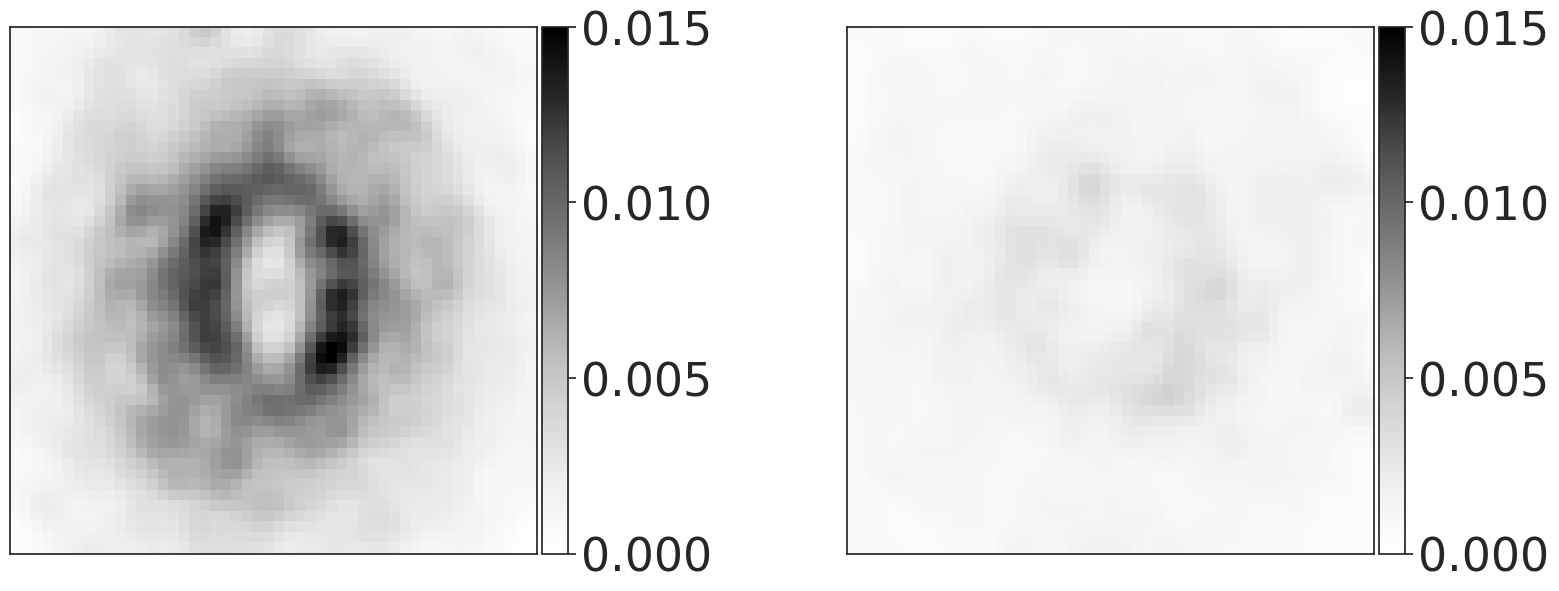

'\nplt.figure(figsize=[10,4])\nplt.title(\'egocentric speed - 100mm lengths ()\')\nfor ndx,tmp in enumerate(summary_data):\n  ax = plt.subplot(1,3,ndx+1)\n  linetmp=[normalize_array(np.mean(i[24:27,:],axis=0)) for i in tmp]\n  for i in linetmp:\n    plt.plot(i, color=\'0.6\', linewidth=1, alpha=0.4)\n  plt.plot(np.mean(linetmp,axis=0), color=\'lightseagreen\', linewidth=3)\n\nax = plt.subplot(1,3,3)\nfor ndx,tmp in enumerate(summary_data):\n  linetmp=[i[25,:] for i in tmp]\n  plt.plot(np.mean(linetmp,axis=0), color=\'lightseagreen\', linewidth=3, alpha=1.0-(0.2+(0.6*ndx)))\nplt.tight_layout()\nplt.savefig(figure_savepath +"_speed_traces_100mm.pdf", transparent=True)\nplt.show()\n'

In [ ]:
#get average ego maps.  *compare to shuffled within dataset (rand temporal shift each fish (np. roll))
#+ get slice through 0/0 and plot across ages (**get value from this - aggregation)
#(raw and normalized to body size)
from mpl_toolkits.axes_grid1 import make_axes_locatable

print("speed MAPS")

#in mm
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale

    data = np.load(folder + exp + '_lev1_egomaps_100mm_full_experiment.npz')
    occupancy_maps,f_alignment_maps = data['occupancy_maps'],data['f_alignment_maps']
    f_speed_maps,f_ang_speed_maps = data['f_speed_maps'],data['f_ang_speed_maps']

    f_speed_maps = [val for sublist in f_speed_maps for val in sublist]

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        s.append(np.mean(f_speed_maps, axis=0))

plt.figure(figsize=[18,10])
for ndx,tmp in enumerate(summary_data):
  print(np.shape(tmp))
  ax = plt.subplot(1,2,ndx+1)
  print('egocentric speed - 100mm lengths ()')
  im = ax.imshow(scipy.ndimage.gaussian_filter(np.mean(tmp,axis=0), sigma=1.0), cmap='Greys', vmin=0, vmax=0.015)
  plt.xticks([])
  plt.yticks([])
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  plt.colorbar(im, cax=cax)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.savefig(figure_savepath +"_speed_maps_100mm.pdf", transparent=True)
plt.show()


(1104870,)
(1103130,)


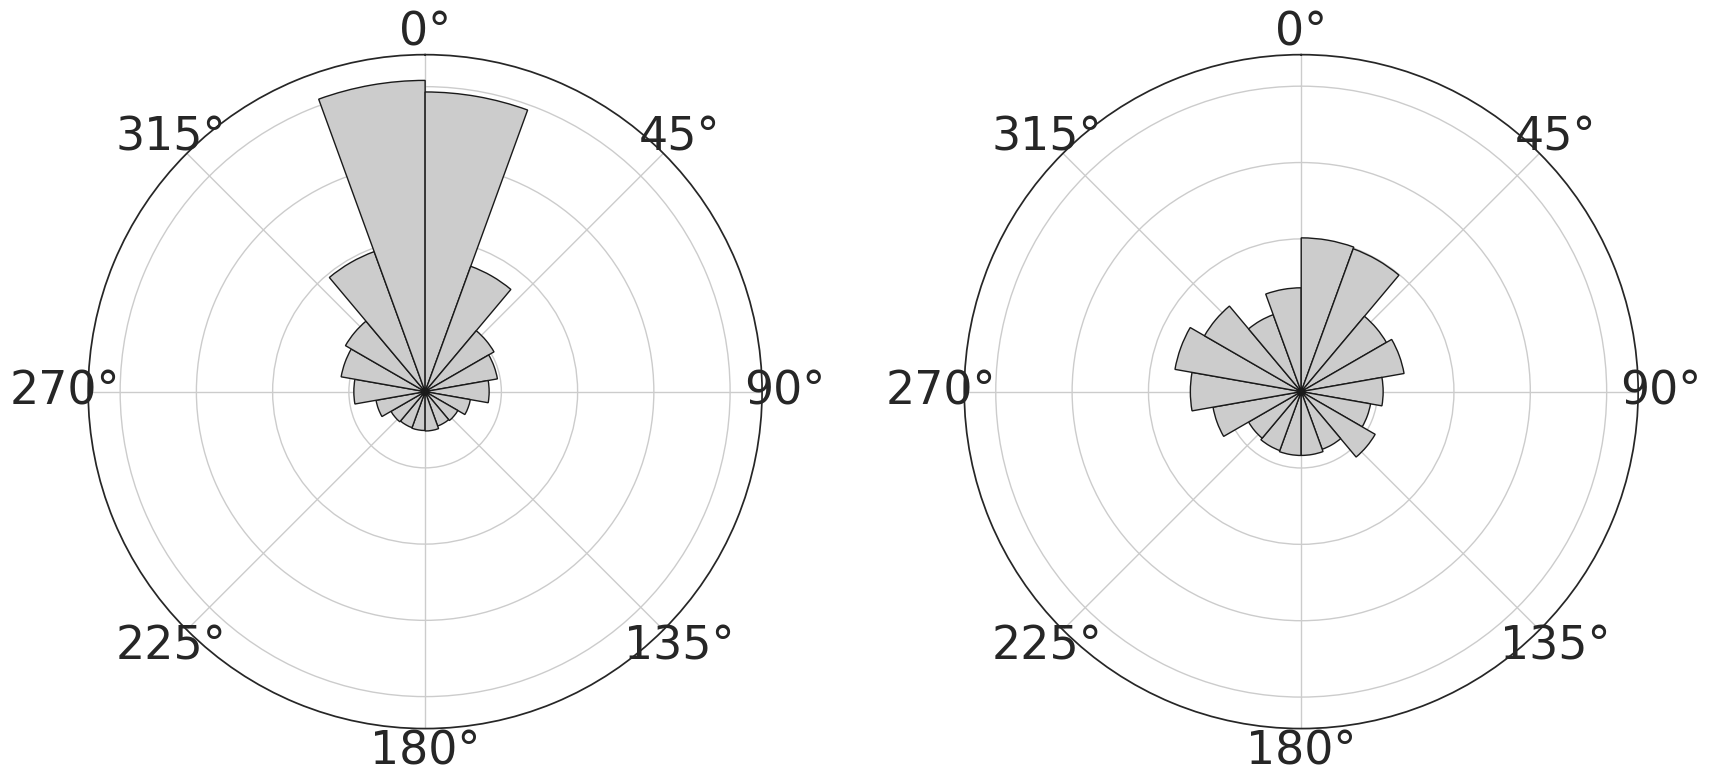

In [ ]:
#in mm
light=[]; dark=[];
summary_data = [light,dark]
conditions = ['light','dark']

for exp in experiments:
  if os.path.isfile(path + exp + '/' + exp + '_lev0_basics.npz') == True:
    folder = path + exp + '/'
    data = np.load(folder + exp + '_lev0_basics.npz')
    fish_num, scale, bodylength = data['fish_num'], data['scale'], data['f_bodylength_mm']
    exp_type, f_x, f_y = data['exp_type'], data['f_x'], data['f_y']
    f_heading, f_speed = data['f_heading'], data['f_speed']*scale
    data = np.load(folder + exp + '_lev0_neighbor_stats.npz')
    f_IIA = data['f_IIA']

    for a,s in zip(conditions,summary_data):
      if exp_type==a:
        f_IIA = [val for sublist in f_IIA for val in sublist]
        s.append(f_IIA)

fig = plt.figure(figsize=[20,10])
for ndx,tmp in enumerate(summary_data):
  tmp = [val for sublist in tmp for val in sublist]
  print(np.shape(tmp))
  ax = fig.add_subplot(1,2,ndx+1, projection='polar')
  bin_size = 20
  a, b=np.histogram(tmp, bins=np.arange(-180, 180+bin_size, bin_size))
  centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
  ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
  ax.set_theta_zero_location("N")
  #ax.set_ylim(0,210000)
  ax.set_ylim(0,len(tmp)/5)
  ax.set_yticklabels([])
  ax.set_theta_direction(-1)
plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.savefig(figure_savepath +"_heading_diff_polar.pdf", transparent=True)
plt.show()
